<a href="https://colab.research.google.com/github/Rutuja-ctrl/rutuja/blob/main/Feature_Scaling_to_improve_model_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Scaling to Improve Model accuracy**

In [ ]:
import pandas as pd


In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

**Import CSV as Dataframe**

In [ ]:
df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Online%20Purchase.csv')

**Get Information of DataFrame**

In [ ]:
df.head()

,Customer_ID,Gender,Age,Salary,Purchased
0,1,Male,35,500,0
1,2,Female,25,300000,1
2,3,Female,100,200000,0
3,15566689,Female,35,57000,0
4,15569641,Female,58,95000,1


In [ ]:
df.shape

(403, 5)

In [ ]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Salary', 'Purchased'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  403 non-null    int64 
 1   Gender       403 non-null    object
 2   Age          403 non-null    int64 
 3   Salary       403 non-null    int64 
 4   Purchased    403 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.9+ KB


In [ ]:
df.describe()

,Customer_ID,Age,Salary,Purchased
count,4.030000e+02,403.000000,403.000000,403.000000
mean,1.557473e+07,37.771712,70465.260546,0.357320
std,1.352373e+06,10.915209,36598.127268,0.479806
min,1.000000e+00,18.000000,500.000000,0.000000
25%,1.562463e+07,29.500000,43000.000000,0.000000
50%,1.569326e+07,37.000000,70000.000000,0.000000
75%,1.575020e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,100.000000,300000.000000,1.000000


**We observe that the mean of Age ,Salary are very different due to measurement scale**

**Get y and X separated**

In [ ]:
y=df['Purchased']

In [ ]:
y.shape

(403,)

In [ ]:
X=df[['Age','Salary']]

In [ ]:
X.shape

(403, 2)

**Get Data Visualization**

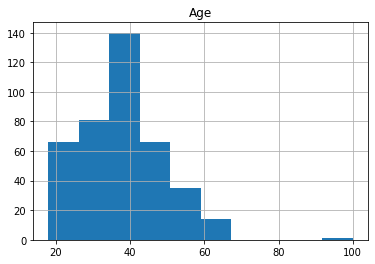

In [ ]:
df[['Age']].hist();

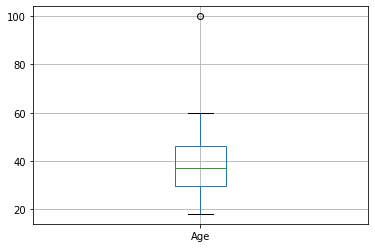

In [ ]:
df[['Age']].boxplot()

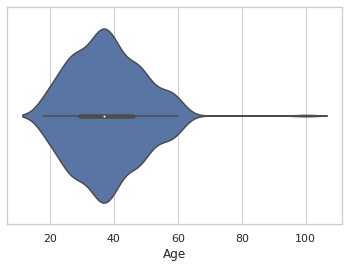

In [ ]:
sns.set_theme(style="whitegrid")

ax = sns.violinplot(x=df["Age"])


**Age has Outlier**

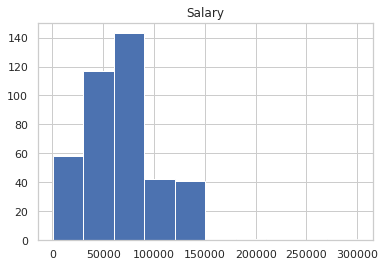

In [ ]:
df[['Salary']].hist();

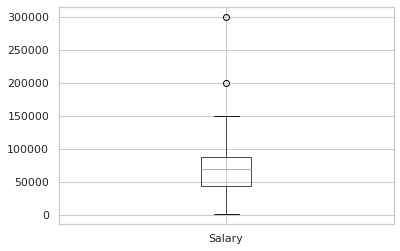

In [ ]:
df[['Salary']].boxplot()

**Salary has a Outlier**

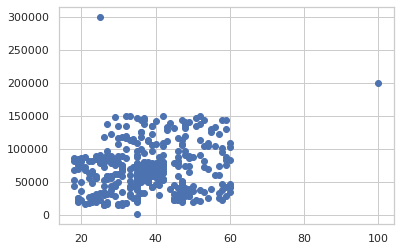

In [ ]:
plt.scatter(df['Age'],df['Salary'])

**Get Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,stratify=y,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((282, 2), (121, 2), (282,), (121,))

**Get Scaling of Features or Attributes or Independent Variable X**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
X_train_ss=ss.fit_transform(X_train)

In [ ]:
X_test_ss=ss.fit_transform(X_test)

**Best is to standardize the train and test samples individually by their own calculated mean and standard deviation .This will help in avoiding any information leakage .**

**Get Visualization of Impact of Scaling.**

In [ ]:
X_train_ss=pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss=pd.DataFrame(X_test_ss, columns=X_test.columns)


**Reduced Impact of Outliers** 

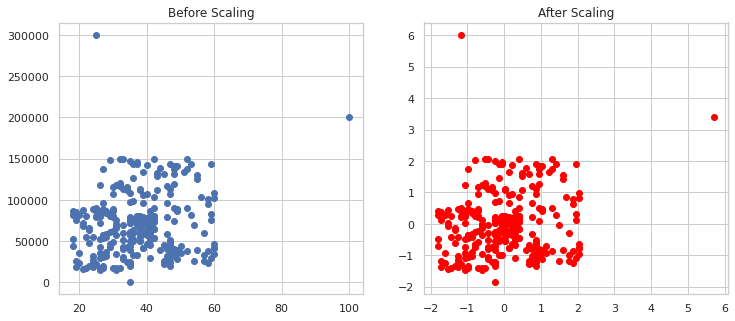

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['Salary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_ss['Age'],X_train_ss['Salary'],color='red')
ax2.set_title('After Scaling')
plt.show()


**Uniform Scale and Distribution**

KDE(Kernel Density Estimation)

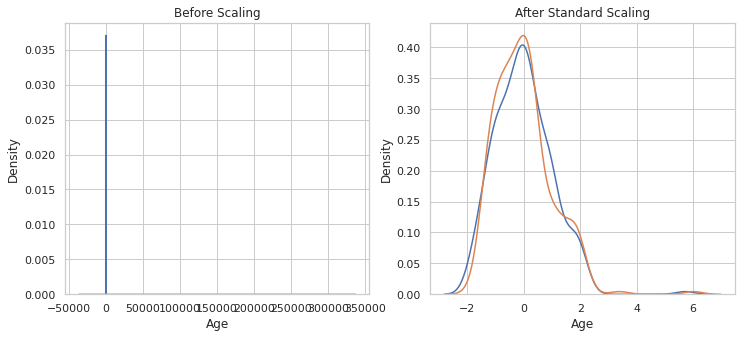

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['Salary'],ax=ax1)
#After Scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_ss['Age'],ax=ax2)
sns.kdeplot(X_train_ss['Salary'],ax=ax2)
plt.show()



**Compare Distribution Before Scaling and After Sacling**

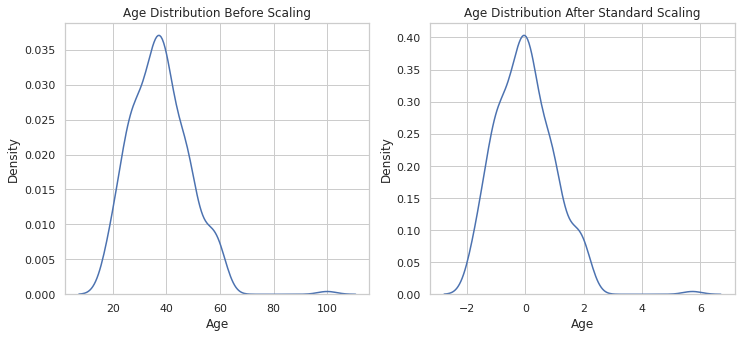

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#Before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
#After Scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_ss['Age'],ax=ax2)

plt.show()

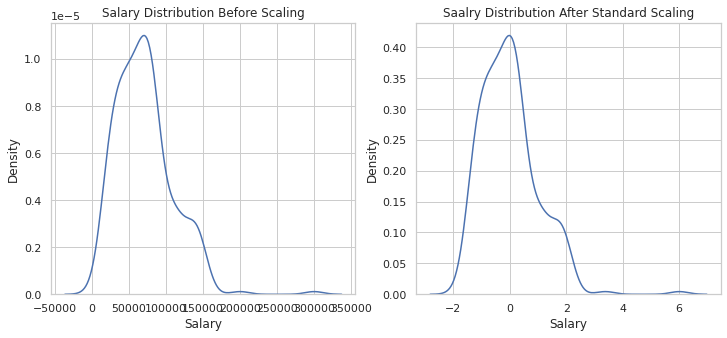

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#Before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['Salary'],ax=ax1)
#After Scaling
ax2.set_title('Saalry Distribution After Standard Scaling')
sns.kdeplot(X_train_ss['Salary'],ax=ax2)

plt.show()

**Why Scaling Is Important**

**Lets run the logistic regression one by one on both Raw X and Scale x**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.6446280991735537

**Accuracy Score with Raw X**

In [ ]:
lr.fit(X_train_ss,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test_ss)

In [ ]:
accuracy_score(y_test,y_pred)

0.8099173553719008

**Accuracy Score with Scaled X**

Accuracy of models with Scales Features,attributes,Independent variables or x has significantly improved vis-a-vis Model with Raw X

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()